# Logistic回归  
最优化算法，拟合函数用于分类，寻找拟合参数的方法

In [1]:
import matplotlib.pyplot as plt
from numpy import *

## 基于logistic回归和sigmoid函数的分类

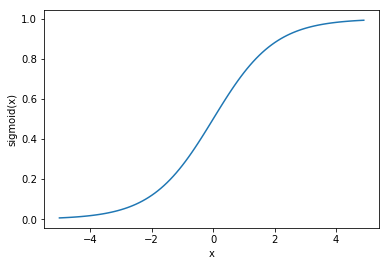

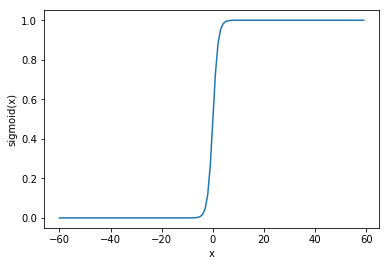

In [8]:
# sigmod函数
# 弥补阶跃函数不可导的问题
# 曲线很像阶跃函数，取值范围（0， 1），作为二分类示性函数很合适
x = arange(-5, 5, 0.1)
y = 1.0 / (1 + e**(- x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.plot(x,y)
plt.show()

x = arange(-60, 60, 1)
y = 1.0 / (1 + e**(- x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.plot(x,y)
plt.show()

## 基于最优化方法的最佳回归系数确定

### 梯度上升法  
思想：要找到某函数的峰值，最好的方式是沿着该函数的梯度方向查找，就像上山坡，最陡峭的地方上升最快  
w = w + αδ  
梯度下降法，寻找函数的低谷值，更新函数类似，下坡  
w = w - αδ 

### loadDataSet()

In [2]:
# 准备数据
# z = w*z = (x0, x1, 1)*(a, b, c) = ax0 + bx1 + c， 数据做扩展
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        #if int(lineArr[2]) == 0:
        #    labelMat.append(1)
        #else:
        #    labelMat.append(0)
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

### drawDataPlot()

In [6]:
# cyb添加
def drawDataPlot(fig):
    # dataMat是扩展后的
    dataMat, labelMat = loadDataSet()
    numData = len(dataMat)
    for i in range(numData):
        if labelMat[i] == 0:
            fig.plot(dataMat[i][1], dataMat[i][2], 'bo')
        else:
            fig.plot(dataMat[i][1], dataMat[i][2], 'r+')
def drawLine(listArg, fig):
    x = arange(-4, 4, 1)
    y = -(float(listArg[0][0]) + x*float(listArg[1][0]))/float(listArg[2][0])
    fig.plot(x, y, 'y')

### 测试数组操作

In [177]:
# 测试
# 数组操作
x = array([1,2])
y = array([1,2])
print x*y
print x.dot(y)
# 矩阵操作
x = mat(x)
y = mat(y)
print x*y.T
print x.T*y

x = [[1,2],[3,4]]
print mat(x).transpose()
print mat(x).T

[1 4]
5
[[5]]
[[1 2]
 [2 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


### sigmoid()

In [4]:
# sigmoid（）
def sigmoid(inX):
    return 1.0/(1.0+exp(-inX))

### gradAscent() logistic regression classification

In [5]:
# 模型形式为 sigmoid(w*x)
# 所求参数为 w
# 对数似然函数为 L(w) = ∑(y(w*x) - log(1+exp(w*x))) = ∑(p1^y*(1-p1)^(1-y))
# 使用极大似然估计模型参数
# 使用梯度上升法查找最佳参数
# 参数更新 w = w + alpha * (delta(L(w), w))
# delta(L(w), w) = y*x - exp(w*x)*w/(1+exp(w*x)) = x(y - exp(w*x)/(1+exp(w*x)))
# 数据集标签怎么标会影响结果吗？
# 比如上方的点被标为0，说明在线的上方，w*x>0，并且sigmoid（w*x）> 0.5，属于0类,结果表示好像不影响，只是变成了-（w*x）
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix m*n
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix m*1
    m,n = shape(dataMatrix)
    alpha = 0.001                           # 步长
    maxCycles = 500                         # 循环次数
    weights = ones((n,1))                   # 初始化参数
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult m*n dot n*1
        error = (labelMat - h)              #vector subtraction m*1
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

### logistic回归二分类测试

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


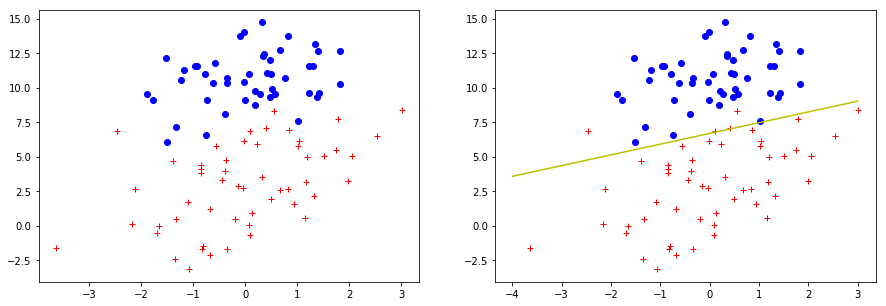

take 2.78999996185 s


In [12]:
# 测试
import time
time1 = time.time()
dataMat, labelMat = loadDataSet()
result = gradAscent(dataMat, labelMat)
print result
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
drawDataPlot(ax1)
drawDataPlot(ax2)
drawLine(result, ax2)
plt.show()
print 'take', time.time() - time1, 's'

### perceptron()

In [18]:
# cyb添加 
# 感知器算法,激活函数为阶跃函数，w*x>0,y = 1,w*x<0,y = 0
# 采用梯度下降法，求使损失函数极小的参数weights
# 损失函数形式L(w) = -∑(w*xi)*yi, 计算对象是那些分错的数据
# 所以更新公式为：w -= -xi*yi, 对于那些分错的数据
def perceptron(dataMat, labelMat):
    m = len(dataMat)
    n = len(dataMat[0])
    weights = ones((n,1))
    cycles = 500
    alpha = 0.001
    for j in range(cycles):
        for i in range(m):
            if labelMat[i] == 0:
                if (-1) * mat(dataMat[i] )* weights < 0:
                    weights += -mat(dataMat[i]).T * alpha
            else:
                if mat(dataMat[i]) * weights < 0:
                    weights += mat(dataMat[i]).T * alpha
            #p = sigmoid(mat(dataMat[i])*weights)         # 1*n n*1
            # n*1  1*(n*1)
            #weights = weights + alpha * mat(dataMat[i]).T * p * (1 - p)
        error = mat(labelMat).T - sigmoid(mat(dataMat)*weights)
        #print sum(error)
    print 'error is', sum(error)
    return weights
    

### 感知机测试

error is  1.18409428525
[[ 1.004     ]
 [ 0.06876242]
 [-0.14023402]]


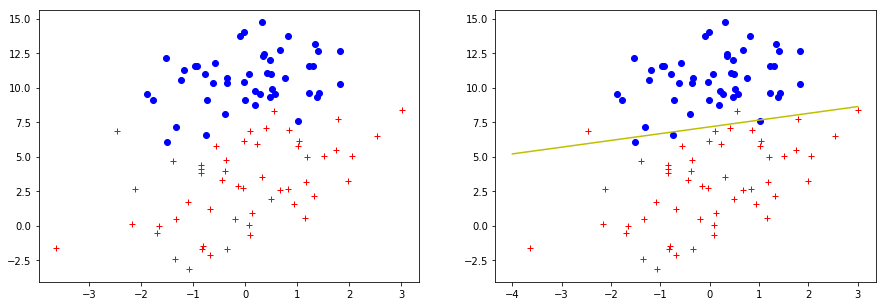

take 7.77200007439 s


In [17]:
# 测试
# 花费的时间更多，是不是矩阵运算更快？
import time 
time1 = time.time()
dataMat, labelMat = loadDataSet()
result = perceptron(dataMat, labelMat)
print result
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
drawDataPlot(ax1)
drawDataPlot(ax2)
drawLine(result, ax2)
plt.show()
print 'take', time.time() - time1, 's'

## 显示函数plotBestFit()

In [87]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

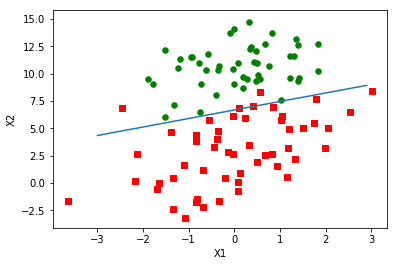

In [140]:
weights = [float(i) for i in array(result)]
plotBestFit(weights)

## 单样本训练

In [129]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        #h = sigmoid(sum(dataMatrix[i]*weights))
        h = sigmoid(dataMatrix[i].dot(weights.T))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

[[ 1.01702007  0.85914348 -0.36579921]]
[1.0170200728876158, 0.85914347942524505, -0.36579921045741998]


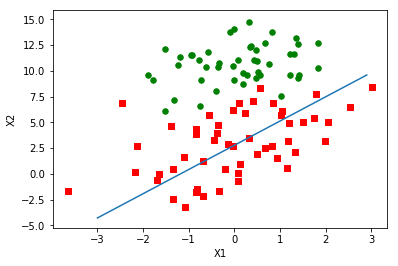

In [192]:
# 测试
weights = stocGradAscent0(mat(dataMat), labelMat)
print weights
weights = [i for i in array(weights)[0]]
print weights
plotBestFit(weights)

In [127]:
a = array([1,2,3])
b = array([2,3,4])
print a*b
print a.dot(b)
print a*(b.T)
print b.T.shape

[ 2  6 12]
20
[ 2  6 12]
(3L,)


## 随机梯度单样本

In [193]:
# 随机梯度
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            #h = sigmoid(sum(dataMatrix[randIndex]*weights))
            h = sigmoid(dataMatrix[randIndex].dot(weights.T))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

[[ 12.75677299   1.08825322  -1.93019329]]
[12.756772993722107, 1.0882532157188791, -1.930193285673117]


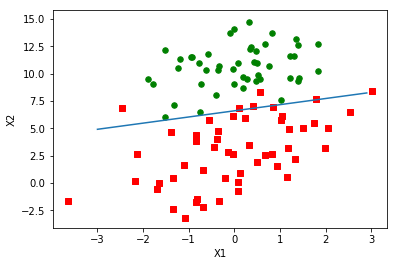

In [145]:
weights = stocGradAscent1(mat(dataMat), labelMat)
print weights
weights = [i for i in array(weights)[0]]
print weights
plotBestFit(weights)

## 性能测试

In [147]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [148]:
def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

In [195]:
colicTest()

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


the error rate of this test is: 0.447761


0.44776119402985076

In [150]:
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))

In [151]:
multiTest()

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.343284
the error rate of this test is: 0.417910
the error rate of this test is: 0.268657
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.283582
the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.223881
the error rate of this test is: 0.253731
after 10 iterations the average error rate is: 0.326866
